## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

*   Which variables are significant in predicting the demand for shared bikes.
*   How well those variables describe the bike demands.

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

##Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

##Steps to be followed in this exercise are as follows:



1.   Reading, Understanding & Visualising Data
2.   Preparing data for model training (train, test, split & scaling)
3.   Training the model
4.   Residual Analysis
5.   Prediction and Evaluation of test set


##Step 1.   Reading, Understanding & Visualising Data



1.   Importing require libraries
2.   Understanding dataset



In [1]:
#importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [2]:
#reading data set
df = pd.read_csv('day.csv')

In [3]:
#data checking
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#checking the shape of data
df.shape

(730, 16)

In [5]:
#describing dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#checking for any null in dataset
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Data Visualisation**

Analyzing Numerical Variables

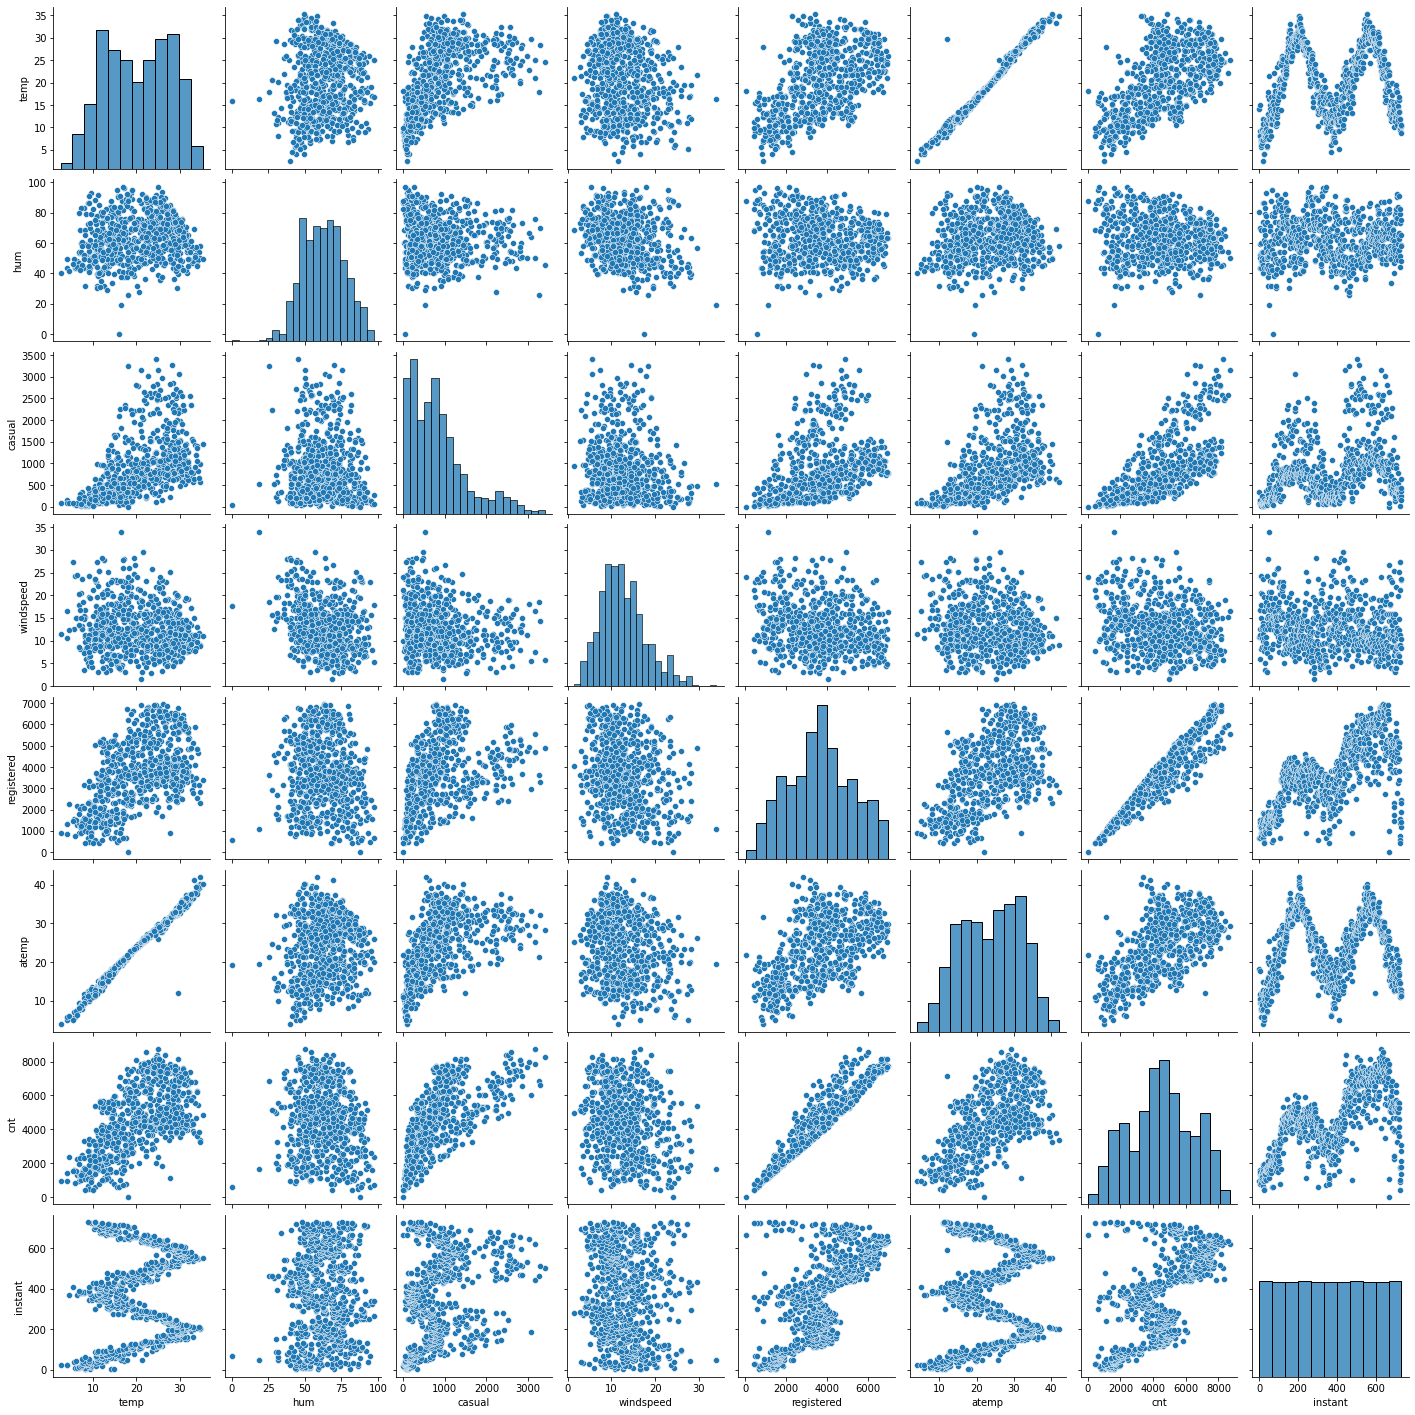

In [8]:
#visualing the numeric variables of the dataset using pairplot
sns.pairplot(df, vars=['temp','hum','casual','windspeed','registered','atemp','cnt','instant'])
plt.show()

#Observation - 
As we can see from above graps, there is strong correlation between count variable and temperature, humidity and windspeed. We need to explore these correlation further with respect to other variables.  

In [9]:
#mappint categorial variables with their subcategories to help the Visualization Analysis
df['season'] =  df.season.map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df['mnth'] = df.mnth.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
df['weekday'] = df.weekday.map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
df['weathersit'] = df.weathersit.map({1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Snow + Fog' })

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Analyzing Categorial Variables

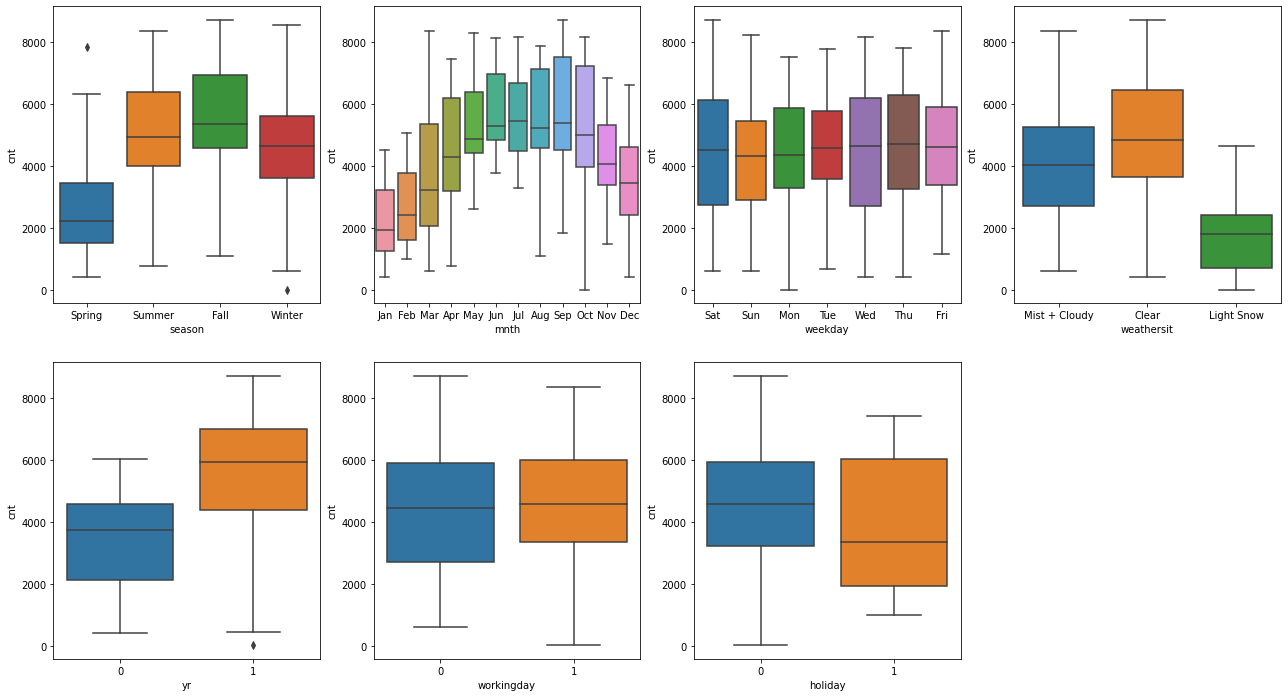

In [10]:
#Visualizing the Categorial Variable of the dataset using plots

plt.figure(figsize=(22, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x = 'season', y = 'cnt', data = df)

plt.subplot(2, 4, 2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)

plt.subplot(2, 4, 3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)

plt.subplot(2, 4, 4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

plt.subplot(2, 4, 5)
sns.boxplot(x = 'yr', y = 'cnt', data = df)

plt.subplot(2, 4, 6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)

plt.subplot(2, 4, 7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)

plt.show()

**Observation from above plots:**

1. People are more likely to take bikes on rent during Summer and the Fall of the Season.
2. September & October months shows high number of renting bikes.
3. Saturday, Wednesday & Thursday showing high number of bikes renting.
4. Clear weather shows high number for taking bikes on rent.
5. More Renting of bikes happened in 2019.
6. No change in bike renting whether it is working day or not.
7. Bikes rental rates are higher on holiday


Lets explore the variables one at a time

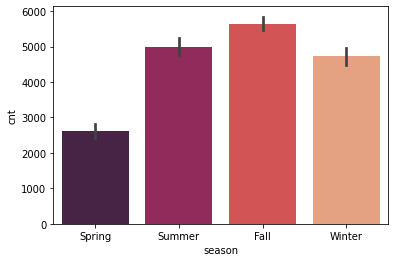

In [11]:
#Barplot to see relation between season and cnt of df
sns.barplot('season', 'cnt', data=df,palette="rocket",)
plt.show()

Bike Rentals are more during the fall season and then in summer

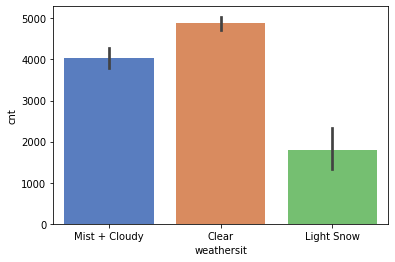

In [12]:
#Relation between weather and cnt of df
sns.barplot('weathersit', 'cnt', palette="muted", data = df)
plt.show()

More demand in partly cloudy weather

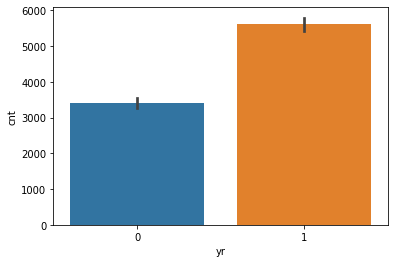

In [13]:
#yr (0: 2018, 1:2019)
#Relation between yr and cnt of bike rentals
sns.barplot('yr', 'cnt',data = df)
plt.show()

There was more demand in the year 2019 than compared to 2018

Yearwise - Ploting BarPlot

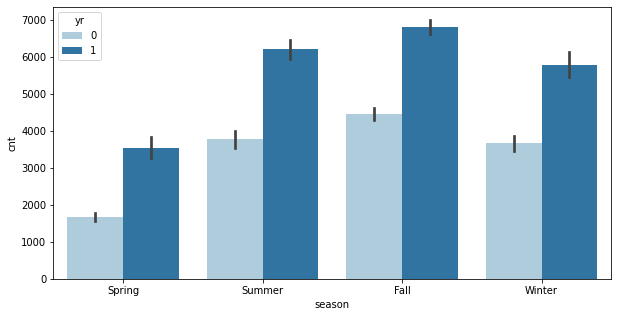

In [14]:
#Relation between season and cnt
plt.figure(figsize=(10,5))
sns.barplot('season', 'cnt', hue='yr', data= df, palette='Paired')
plt.show()

Summer & Fall show more booking compared to other season of the year.

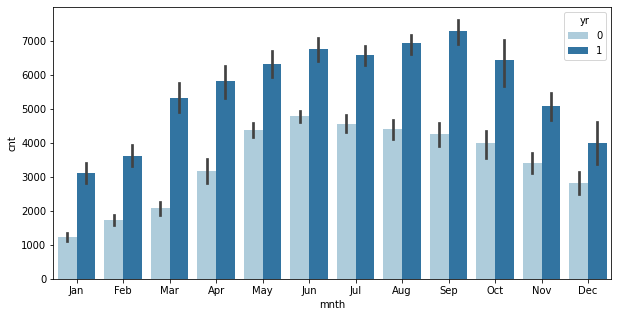

In [15]:
#Relation between mnth and cnt
plt.figure(figsize=(10,5))
sns.barplot('mnth', 'cnt', hue='yr', data= df, palette='Paired')
plt.show()

Sep has the highest demand compared to other months

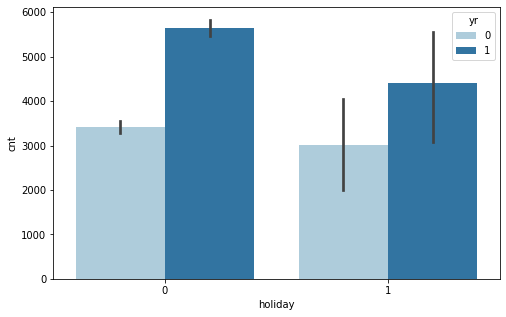

In [16]:
#Relation between holiday and cnt
plt.figure(figsize=(8,5))
sns.barplot('holiday', 'cnt', hue='yr', data= df, palette='Paired')
plt.show()

More people prefer to rent bike on working days and during holiday people prefer to stay home.

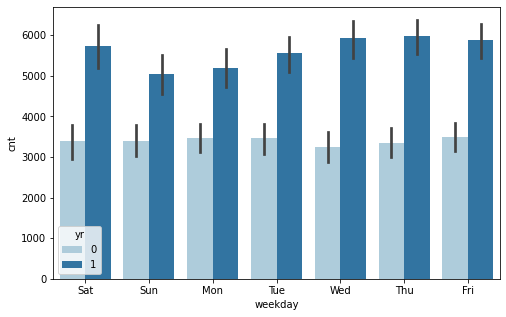

In [17]:
#Relation between weekday and cnt
plt.figure(figsize=(8,5))
sns.barplot('weekday', 'cnt', hue='yr', data= df, palette='Paired')
plt.show()

Wed, Thu, Fir, Sat and Sun have more number of users as compared to the start of the week in the year 2019 while it is same for all day in year 2018

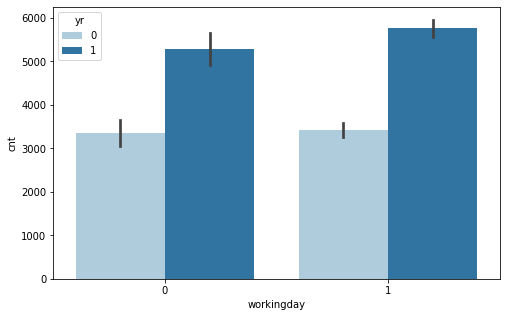

In [18]:
#Relation between workingday and cnt
plt.figure(figsize=(8,5))
sns.barplot('workingday', 'cnt', hue='yr', data= df, palette='Paired')
plt.show()

Booking are almost equal either on working day or non-working day. But, the cnt is more from 2018 to 2019.

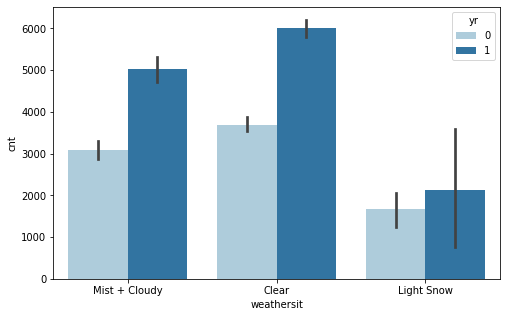

In [19]:
#Relation between weathersit and cnt
plt.figure(figsize=(8,5))
sns.barplot('weathersit', 'cnt', hue='yr', data= df, palette='Paired')
plt.show()

People renting bike during clear wheather or few clouds

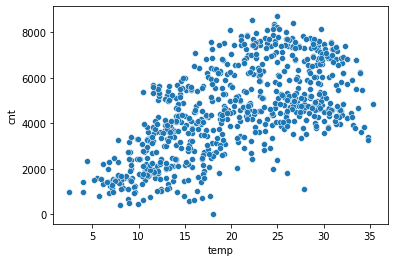

In [20]:
#scatter plot for temperature to cnt
sns.scatterplot(x='temp',y='cnt' ,data = df)
plt.show()

More bike renting occured at higher temperatures

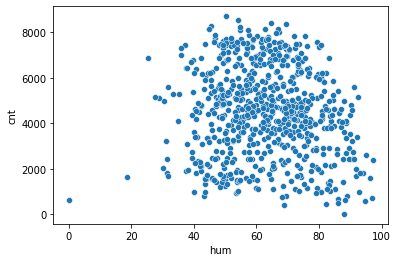

In [21]:
sns.scatterplot(x='hum', y='cnt',data = df)
plt.show()

More at high humidity

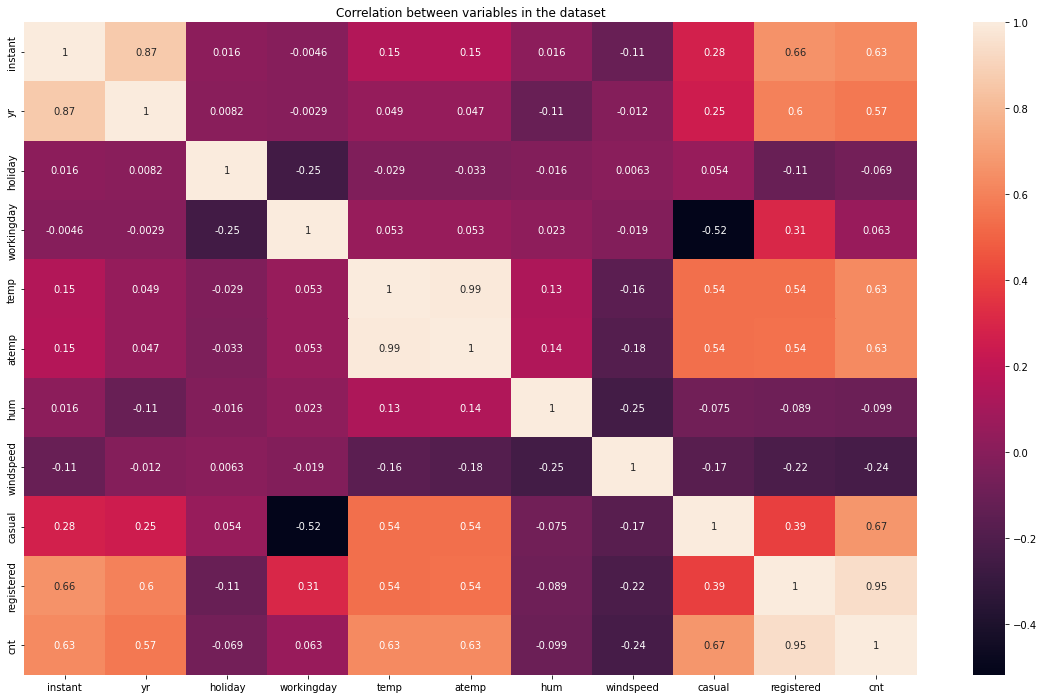

In [22]:
#showcasing heatmap for correlation between variables and decide whether to perform linear regression on dataset

plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation between variables in the dataset')
plt.show()

#Observation
As we can see from the heatmap, there are variables correlated to count (cnt) variable those are registered, casual, temp, atemp, yr, workingday.
Hence we can perform Linear Regression on the dataset.


In [23]:
#Dropping unnecessary variable from the dataset
#Dropping following variables atemp, instant, dteday, casual, registered as they are not needed for the analysis
#atemp is not needed as temp is already being referred, dteday & casual are also unnecessary for the linear regression analysis

df = df.drop(['atemp', 'instant', 'dteday', 'casual', 'registered'], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [24]:
df.shape

(730, 11)

In [25]:
df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [27]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

In [28]:
#creating dummy variable
#creating dummy variables for the variables like month, weekday, weathersit, seasons

month = pd.get_dummies(df.mnth, drop_first = True)
weekday = pd.get_dummies(df.weekday, drop_first = True)
weathersit = pd.get_dummies(df.weathersit, drop_first = True)
season = pd.get_dummies(df.season, drop_first = True)

In [29]:
#now adding dummy variables to the main data frame
df = pd.concat([df, month, weekday, weathersit, season], axis = 1)
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter
0,Spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,Spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [30]:
#drop variables mnth, weathersit, weekday, season as we have included the respective dummies for it
df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)
df.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,0,0,1,8.378268,51.8261,6.000868,1606,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6,0,0,1,8.057402,49.8696,11.304642,1510,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7,0,0,0,6.765000,53.5833,17.875868,959,0,0,0,...,1,0,0,0,0,0,1,1,0,0
8,0,0,0,5.671653,43.4167,24.250650,822,0,0,0,...,0,1,0,0,0,0,0,1,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
df.shape

(730, 29)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    uint8  
 8   Dec            730 non-null    uint8  
 9   Feb            730 non-null    uint8  
 10  Jan            730 non-null    uint8  
 11  Jul            730 non-null    uint8  
 12  Jun            730 non-null    uint8  
 13  Mar            730 non-null    uint8  
 14  May            730 non-null    uint8  
 15  Nov            730 non-null    uint8  
 16  Oct            730 non-null    uint8  
 17  Sep            730 non-null    uint8  
 18  Mon       

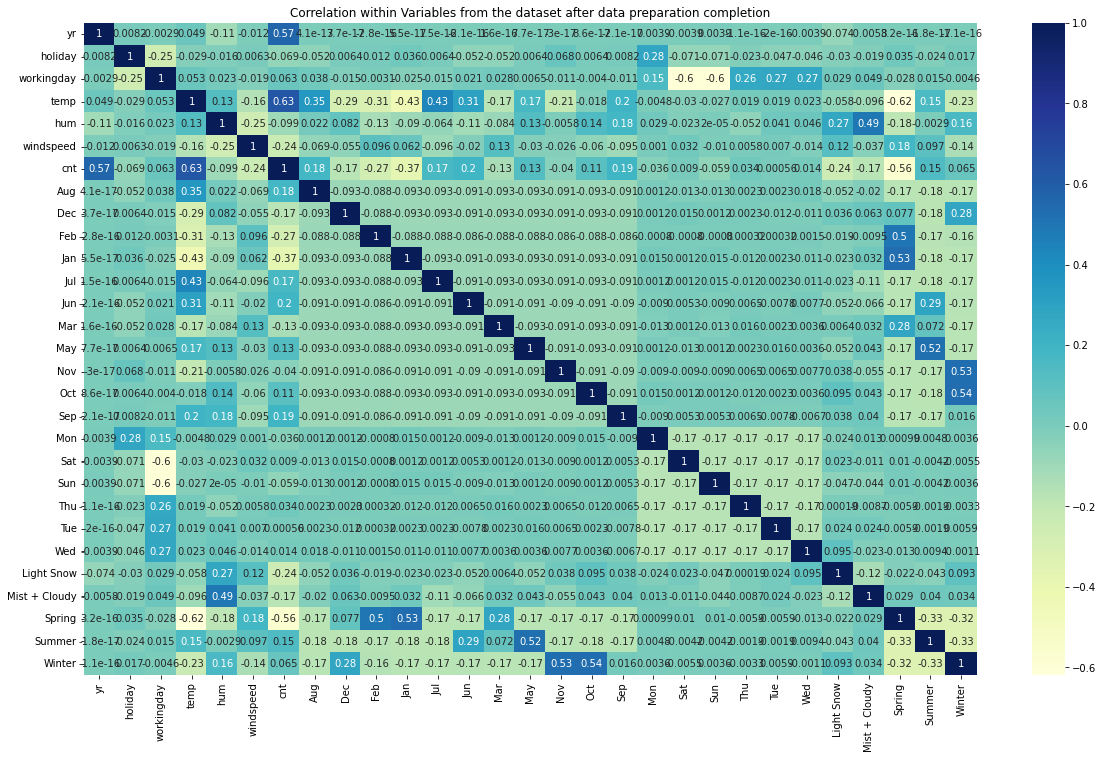

In [33]:
#heatmap to showcase the correlation between the newly added variables

plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)
plt.title('Correlation within Variables from the dataset after data preparation completion')
plt.show()

##Step 2.   Preparing data for model training (train, test, split & scaling)

In [34]:
#splitting the dataset into train and test sets
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [35]:
#checking the shape of the training dataset
df_train.shape

(510, 29)

In [36]:
#checking the shape of the test dataset
df_test.shape

(220, 29)

Scalling the Variables

In [37]:
#we need to rescale the variable such as hum, temp, windspeed, cnt as they have large values as compared to other variables in the dataset
#we need to normalize these values using the scaler.fit_transform()

scaler = MinMaxScaler()
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']
df_train[scaler_var] = scaler.fit_transform(df_train[scaler_var])

In [38]:
#checking the normalized values of the train set after performing scaling
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Observation**

The max amount is 1 in all the cases of the variables which is an indication that our rescaling process has worked

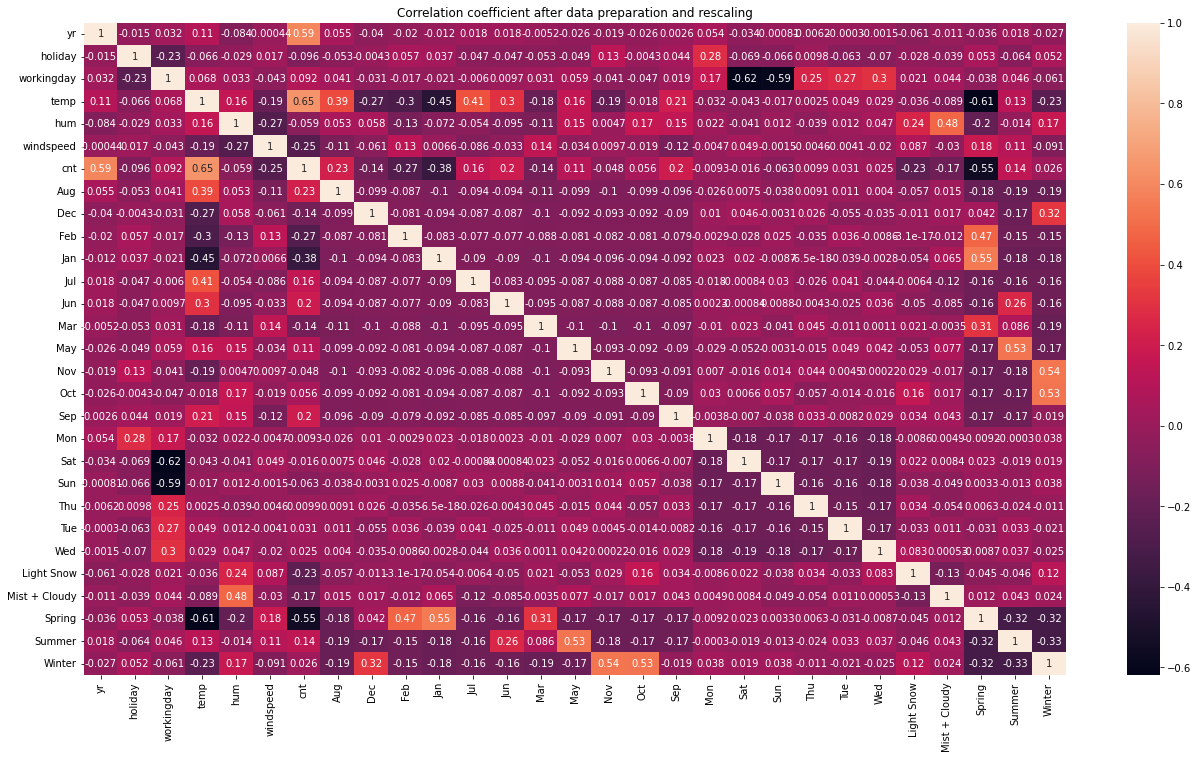

In [39]:
#correlation coefficients to see which are the variables are highly correlated post data preparation and rescaling has been performed

plt.figure(figsize = (22, 12))
sns.heatmap(df_train.corr(), annot = True)
plt.title('Correlation coefficient after data preparation and rescaling')
plt.show()

**Observation**

From the above heatmap, the target variable 'cnt' is highly correlated with the temp variable, lets observe the variance using pairplot 

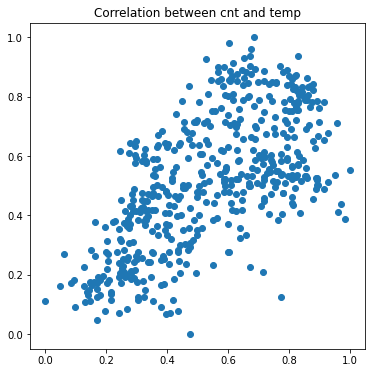

In [40]:
#checking for correlation within variable cnt and temp using a pairplot

plt.figure(figsize = [6, 6])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('Correlation between cnt and temp')
plt.show()

High correlation between temp and cnt

#Step 3: Training the Model

In [41]:
#finally its time to build our first model using the variable temp
#preparing the variables for model building

X_train = df_train
y_train = df_train.pop('cnt')

In [42]:
y_train.head(5)

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [43]:
#checking variable
X_train.head(5)

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [44]:
#adding constant (intercept)
X_train_sm = sm.add_constant(X_train['temp'])

#creating first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [45]:
#checking model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           2.46e-61
Time:                        10:55:50   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is **.416** which means **41%** of the variance in the count quantity is explained by temp

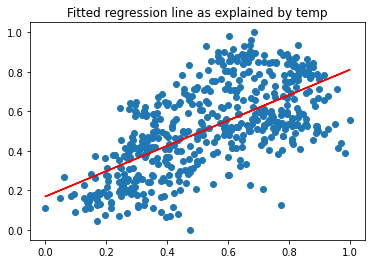

In [46]:
#visualising data using scatter plot and fitted the regression line to see the best fit line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409 * X_train_sm.iloc[:, 1], 'r')
plt.title('Fitted regression line as explained by temp')
plt.show()

In [47]:
#adding another variable thus performing Multiple Regression 
#adding variable yr and checking to see if it improves the R-squared

X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

#creating second model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [48]:
#checking summary with temp and yr as selected variables
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          3.34e-130
Time:                        10:56:04   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is now **.692** which means **69%** of the variance in the count quantity is explained by temperature and year data

In [49]:
#adding all variables and finding out the R-squared values
#checking all the variables in our dataset
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'Aug',
       'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy',
       'Spring', 'Summer', 'Winter'],
      dtype='object')

**Recursive feature elimination (RFE)**


In [50]:
#building models with variables
X_train_sm = sm.add_constant(X_train)

#create third model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const            0.243106
yr               0.232438
holiday          0.010042
workingday       0.096177
temp             0.445359
hum             -0.151473
windspeed       -0.186010
Aug              0.020376
Dec             -0.044277
Feb             -0.032441
Jan             -0.063315
Jul             -0.033848
Jun              0.004602
Mar              0.001274
May              0.024673
Nov             -0.039879
Oct              0.007546
Sep              0.085938
Mon             -0.020931
Sat              0.095554
Sun              0.041333
Thu             -0.009131
Tue             -0.017931
Wed             -0.005495
Light Snow      -0.255835
Mist + Cloudy   -0.059551
Spring          -0.044834
Summer           0.043002
Winter           0.107632
dtype: float64

In [51]:
#checking summary for all the variables
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          3.00e-181
Time:                        10:56:18   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2431      0.035      6.888      0.000       0.174       0.312
yr                0.2324      0.008     28.819      0.000       0.217       0.248
holiday           0.0100      0.024      0.418      0.676      -0.037       0.057
workingday        0.0962      0.012      7.835      0.000       0.072       0.120
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug               0.0204      0.034      0.607      0.544      -0.046       0.086
Dec              -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb              -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan              -0.0633      0.034     -1.885      0.060      -0.129       0.003
Jul              -0.0338      0.035     -0.969      0.333      -0.102       0.035
Jun               0.0046      0.025      0.186      0.853      -0.044       0.053
Mar               0.0013      0.025      0.052      0.959      -0.047       0.050
May               0.0247      0.021      1.173      0.241      -0.017       0.066
Nov              -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct               0.0075      0.036      0.210      0.834      -0.063       0.078
Sep               0.0859      0.032      2.692      0.007       0.023       0.149
Mon              -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat               0.0956      0.014      6.958      0.000       0.069       0.123
Sun               0.0413      0.014      2.964      0.003       0.014       0.069
Thu              -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue              -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed              -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist + Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
Spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
Summer            0.0430      0.026      1.645      0.101      -0.008       0.094
Winter            0.1076      0.028      3.853      0.000       0.053       0.163
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     7.20e+15
================================================================

R-squared is now **.853** which means **85%** of the variance in the cnt quantity is explained with all the variables

**Using RFE**

We found out the R-squared values and the best fit lines using manual for the feature selection. Now we will use the automated approach for selecting the values required for the building the optimized models and dropping the values which are repeated for the model building approach. We will use RFE for the automated along with Variance Inflation Factor(VIF) to determine the variables to drop.

In [52]:
#checking no of columns
len(df.columns)

29

In [53]:
#create RFE object
lm = LinearRegression()
lm.fit(X_train, y_train)

#feature selection
rfe = RFE(lm, n_features_to_select = 15)

#fitting rfe object on the trainig dataset
rfe = rfe.fit(X_train, y_train)

In [54]:
#checking selected feature
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [55]:
#selected features
true_rfe = X_train.columns[rfe.support_]

In [56]:
#check value
true_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan', 'Jul',
       'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'Spring', 'Summer',
       'Winter'],
      dtype='object')

In [57]:
#check len
len(true_rfe)

15

In [58]:
#model building using rfe
#create set with rfe
X_train_rfe = X_train[true_rfe]

In [59]:
#adding constant to the training variables
X_train_rfe = sm.add_constant(X_train_rfe)

#create first model
lr = sm.OLS(y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.params

const            0.251893
yr               0.230527
holiday         -0.058173
workingday       0.043335
temp             0.509619
hum             -0.156299
windspeed       -0.186259
Jan             -0.034512
Jul             -0.052918
Sep              0.081395
Sat              0.053552
Light Snow      -0.247464
Mist + Cloudy   -0.056318
Spring          -0.050897
Summer           0.050762
Winter           0.093301
dtype: float64

In [60]:
#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          4.22e-191
Time:                        10:56:58   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969      0.000       0.181       0.323
yr                0.2305      0.008     28.795      0.000       0.215       0.246
holiday          -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday        0.0433      0.012      3.762      0.000       0.021       0.066
temp              0.5096      0.034     14.837      0.000       0.442       0.577
hum              -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed        -0.1863      0.025     -7.310      0.000      -0.236      -0.136
Jan              -0.0345      0.017     -1.989      0.047      -0.069      -0.000
Jul              -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep               0.0814      0.016      4.945      0.000       0.049       0.114
Sat               0.0536      0.014      3.694      0.000       0.025       0.082
Light Snow       -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist + Cloudy    -0.0563      0.010     -5.439      0.000      -0.077      -0.036
Spring           -0.0509      0.021     -2.464      0.014      -0.091      -0.010
Summer            0.0508      0.015      3.423      0.001       0.022       0.080
Winter            0.0933      0.017      5.403      0.000       0.059       0.127
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is now **.84** which means **84%** of the variance in the cnt quantity is explained with all the variables

In [61]:
#checking Variance Inflation Factor (VIF)
#drop the const variable from the dataset
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [62]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [63]:
#check the VIF for the model
calculateVIF(X_train_rfe)

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,Spring,4.53
14,Winter,3.46
13,Summer,2.85
11,Mist + Cloudy,2.29
0,yr,2.09
9,Sat,1.98


**Checking conditions for the variables elimination?**

Following are some of the potential conditions which can be helpful while deciding which variables to check. These conditions are formulated after studying the VIF, p-values and going through the course material.

*   High p-value, high VIF : Suppoed to be dropped
*   High-Low :
      1.   High p, low VIF : Remove these first, then build model again and check VIF again

      2.   Low p, high VIF : Remove these later

*   Low p-value, low VIF : Keep these variables

**hum** variable seems to be insignificant in presence of other variables due to high VIF(**VIF > 25**)

In [64]:
#hum variable can be dropped due to high VIF value i.e. > 25
X_train_new_1 = X_train_rfe.drop(['hum'], axis = 1)

In [65]:
#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.60e-188
Time:                        10:57:20   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1737      0.031      5.520      0.000       0.112       0.235
yr                0.2345      0.008     29.009      0.000       0.219       0.250
holiday          -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday        0.0464      0.012      3.966      0.000       0.023       0.069
temp              0.4722      0.034     14.005      0.000       0.406       0.538
windspeed        -0.1563      0.025     -6.286      0.000      -0.205      -0.107
Jan              -0.0392      0.018     -2.227      0.026      -0.074      -0.005
Jul              -0.0479      0.018     -2.614      0.009      -0.084      -0.012
Sep               0.0755      0.017      4.527      0.000       0.043       0.108
Sat               0.0583      0.015      3.968      0.000       0.029       0.087
Light Snow       -0.2908      0.024    -11.977      0.000      -0.339      -0.243
Mist + Cloudy    -0.0813      0.009     -9.437      0.000      -0.098      -0.064
Spring           -0.0599      0.021     -2.867      0.004      -0.101      -0.019
Summer            0.0445      0.015      2.967      0.003       0.015       0.074
Winter            0.0784      0.017      4.562      0.000       0.045       0.112
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is now **.84** which means **84%** of the variance in the cnt quantity is explained with all the variables

In [66]:
#checking Variance Inflation Factor (VIF)
#drop the const variable from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)

In [67]:
#check the VIF for the model
calculateVIF(X_train_new_1)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,Spring,3.07
12,Summer,2.34
0,yr,2.08
13,Winter,1.98
8,Sat,1.97
5,Jan,1.62
6,Jul,1.59


**Jan** variable seems to be insignificant due to high VIF and hence can be dropped

In [68]:
#Jan variable can be dropped due to high VIF
X_train_new_2 = X_train_new_1.drop(['Jan'], axis = 1)

In [69]:
#adding constant to training variable
X_train_lr2 = sm.add_constant(X_train_new_2)

#creating second training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr2)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.28e-188
Time:                        10:57:37   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1576      0.031      5.126      0.000       0.097       0.218
yr                0.2337      0.008     28.828      0.000       0.218       0.250
holiday          -0.0567      0.027     -2.069      0.039      -0.111      -0.003
workingday        0.0461      0.012      3.931      0.000       0.023       0.069
temp              0.4915      0.033     15.027      0.000       0.427       0.556
windspeed        -0.1491      0.025     -6.024      0.000      -0.198      -0.100
Jul              -0.0496      0.018     -2.702      0.007      -0.086      -0.014
Sep               0.0759      0.017      4.537      0.000       0.043       0.109
Sat               0.0579      0.015      3.924      0.000       0.029       0.087
Light Snow       -0.2895      0.024    -11.880      0.000      -0.337      -0.242
Mist + Cloudy    -0.0822      0.009     -9.514      0.000      -0.099      -0.065
Spring           -0.0655      0.021     -3.147      0.002      -0.106      -0.025
Summer            0.0477      0.015      3.180      0.002       0.018       0.077
Winter            0.0846      0.017      4.971      0.000       0.051       0.118
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is now **.84** which means **84%** of the variance in the cnt quantity is explained with all the variables

In [70]:
#checking Variance Inflation Factor (VIF)
#drop the const variable from the dataset
X_train_lr2 = X_train_lr2.drop(['const'], axis = 1)

In [71]:
#check the VIF for the model
calculateVIF(X_train_new_2)

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
10,Spring,2.49
11,Summer,2.34
0,yr,2.07
12,Winter,1.98
7,Sat,1.96
5,Jul,1.58
9,Mist + Cloudy,1.57


**Jul** variable seems to be insignificant in presence of other variables due to high p-value and low VIF and hence can be dropped

In [72]:
#Jul variable can be dropped due to high VIF
X_train_new_3 = X_train_new_2.drop(['Jul'], axis = 1)

In [73]:
#adding constant to training variable
X_train_lr3 = sm.add_constant(X_train_new_3)

#creating third training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr3)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.7
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          3.16e-188
Time:                        10:57:55   Log-Likelihood:                 504.48
No. Observations:                 510   AIC:                            -983.0
Df Residuals:                     497   BIC:                            -927.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1484      0.031      4.827      0.000       0.088       0.209
yr                0.2342      0.008     28.718      0.000       0.218       0.250
holiday          -0.0547      0.028     -1.982      0.048      -0.109      -0.000
workingday        0.0474      0.012      4.016      0.000       0.024       0.071
temp              0.4789      0.033     14.699      0.000       0.415       0.543
windspeed        -0.1492      0.025     -5.990      0.000      -0.198      -0.100
Sep               0.0894      0.016      5.559      0.000       0.058       0.121
Sat               0.0585      0.015      3.942      0.000       0.029       0.088
Light Snow       -0.2904      0.025    -11.844      0.000      -0.339      -0.242
Mist + Cloudy    -0.0809      0.009     -9.318      0.000      -0.098      -0.064
Spring           -0.0543      0.021     -2.644      0.008      -0.095      -0.014
Summer            0.0625      0.014      4.456      0.000       0.035       0.090
Winter            0.0968      0.017      5.863      0.000       0.064       0.129
==============================================================================
Omnibus:                       70.944   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.372
Skew:                          -0.729   Prob(JB):                     2.74e-37
Kurtosis:                       5.408   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is now **.839** which means **83%** of the variance in the cnt quantity is explained with all the variables

In [74]:
#checking Variance Inflation Factor (VIF)
#drop the const variable from the dataset
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)

In [75]:
#check the VIF for the model
calculateVIF(X_train_new_3)

,Features,VIF
3,temp,5.70
2,workingday,5.20
4,windspeed,4.65
9,Spring,2.40
0,yr,2.07
10,Summer,2.01
6,Sat,1.96
11,Winter,1.83
8,Mist + Cloudy,1.57
5,Sep,1.24


**workingday** seems to be insignificant variable,by looking at high VIF.

In [76]:
#workingday variable can be dropped due to high VIF
X_train_new_4 = X_train_new_3.drop(['workingday'], axis = 1)

In [77]:
#adding constant to training variable
X_train_lr4 = sm.add_constant(X_train_new_4)

#creating fourth training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr4)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.9
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          5.55e-186
Time:                        10:58:12   Log-Likelihood:                 496.34
No. Observations:                 510   AIC:                            -968.7
Df Residuals:                     498   BIC:                            -917.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1874      0.030      6.327      0.000       0.129       0.246
yr                0.2346      0.008     28.330      0.000       0.218       0.251
holiday          -0.0930      0.026     -3.540      0.000      -0.145      -0.041
temp              0.4790      0.033     14.485      0.000       0.414       0.544
windspeed        -0.1501      0.025     -5.938      0.000      -0.200      -0.100
Sep               0.0909      0.016      5.572      0.000       0.059       0.123
Sat               0.0195      0.011      1.710      0.088      -0.003       0.042
Light Snow       -0.2855      0.025    -11.484      0.000      -0.334      -0.237
Mist + Cloudy    -0.0788      0.009     -8.965      0.000      -0.096      -0.062
Spring           -0.0552      0.021     -2.647      0.008      -0.096      -0.014
Summer            0.0625      0.014      4.389      0.000       0.035       0.091
Winter            0.0945      0.017      5.640      0.000       0.062       0.127
==============================================================================
Omnibus:                       69.512   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.038
Skew:                          -0.748   Prob(JB):                     2.63e-33
Kurtosis:                       5.197   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is now **.83** which means **83%** of the variance in the cnt quantity is explained with all the variables

In [78]:
#checking Variance Inflation Factor (VIF)
#drop the const variable from the dataset
X_train_lr4 = X_train_lr4.drop(['const'], axis = 1)

In [79]:
#check the VIF for the model
calculateVIF(X_train_new_4)

,Features,VIF
3,windspeed,4.62
2,temp,3.87
0,yr,2.07
8,Spring,2.01
9,Summer,1.90
10,Winter,1.64
7,Mist + Cloudy,1.55
4,Sep,1.23
5,Sat,1.19
6,Light Snow,1.08


**windspeed** variable seems to be insignificant due to high VIF value and negative coefficient correlation

In [80]:
#windspeed variable can be dropped due to high VIF
X_train_new_5 = X_train_new_4.drop(['windspeed'], axis = 1)

In [81]:
#adding constant to training variable
X_train_lr5 = sm.add_constant(X_train_new_5)

#creating fifth training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr5)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.3
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          8.38e-180
Time:                        10:58:32   Log-Likelihood:                 478.89
No. Observations:                 510   AIC:                            -935.8
Df Residuals:                     499   BIC:                            -889.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1379      0.029      4.695      0.000       0.080       0.196
yr                0.2335      0.009     27.288      0.000       0.217       0.250
holiday          -0.0964      0.027     -3.548      0.000      -0.150      -0.043
temp              0.4908      0.034     14.383      0.000       0.424       0.558
Sep               0.0954      0.017      5.662      0.000       0.062       0.129
Sat               0.0163      0.012      1.389      0.165      -0.007       0.039
Light Snow       -0.3003      0.026    -11.747      0.000      -0.351      -0.250
Mist + Cloudy    -0.0771      0.009     -8.484      0.000      -0.095      -0.059
Spring           -0.0647      0.021     -3.012      0.003      -0.107      -0.022
Summer            0.0526      0.015      3.595      0.000       0.024       0.081
Winter            0.0957      0.017      5.527      0.000       0.062       0.130
==============================================================================
Omnibus:                       74.571   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.524
Skew:                          -0.765   Prob(JB):                     4.66e-39
Kurtosis:                       5.443   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is now **.822** which means **82%** of the variance in the cnt quantity is explained with all the variables

In [82]:
#checking Variance Inflation Factor (VIF)
#drop the const variable from the dataset
X_train_lr5 = X_train_lr5.drop(['const'], axis = 1)

In [83]:
#check the VIF for the model
calculateVIF(X_train_new_5)

,Features,VIF
2,temp,2.96
0,yr,2.06
8,Summer,1.64
6,Mist + Cloudy,1.55
9,Winter,1.45
7,Spring,1.36
3,Sep,1.23
4,Sat,1.18
5,Light Snow,1.07
1,holiday,1.05


Yes!!! We have our final model ready now.

The p values shows the significance of the variables and VIF which shows how variables are correlated with each other. Based on these two parameters we have decided which variable need to be dropped.

The VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using this model only.

- The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

- A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we are in good shape, and can proceed with our regression

- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of **0.822** or **82.2%**

- The adjusted R-squared adjusts for the number of terms in the model. And we got it around **0.818** or **81%**

So our final model is **X_train_lr5** which is obtained by removing hum, Jan, Jul, workingday and windspeed variables from the RFE support columns

#Step 4: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [84]:
X_train_lr5 = sm.add_constant(X_train_lr5)
#X_train_lr5.columns
X_train_lr5

,const,yr,holiday,temp,Sep,Sat,Light Snow,Mist + Cloudy,Spring,Summer,Winter
576,1.0,1,0,0.815169,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0,1,0,1,1,0,0
728,1.0,1,0,0.245101,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0,1,0,1,0,1,0
111,1.0,0,0,0.345824,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0,1,0,1,0,0,1
79,1.0,0,0,0.462664,0,0,0,1,0,1,0


In [85]:
#y train predicted
y_train_pred = lr_model.predict(X_train_lr5)
#y_train.shape

<Figure size 432x288 with 0 Axes>

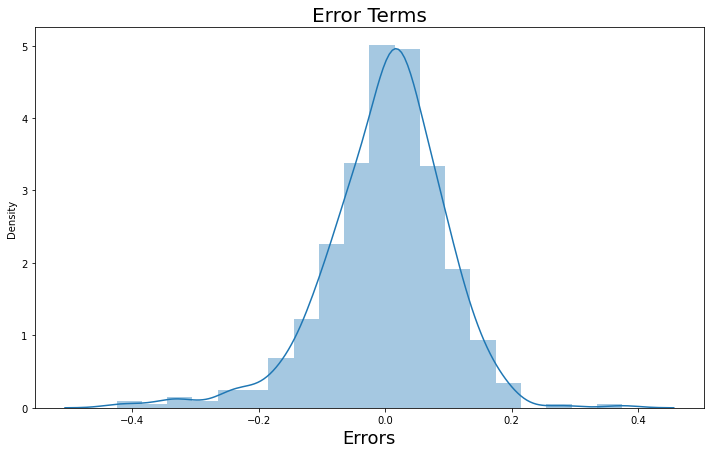

In [86]:
fig = plt.figure()
plt.figure(figsize=(12,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

We can see Error terms are normally distributed

**Multi Colinearity**

In [87]:
calculateVIF(X_train_new_5)

,Features,VIF
2,temp,2.96
0,yr,2.06
8,Summer,1.64
6,Mist + Cloudy,1.55
9,Winter,1.45
7,Spring,1.36
3,Sep,1.23
4,Sat,1.18
5,Light Snow,1.07
1,holiday,1.05


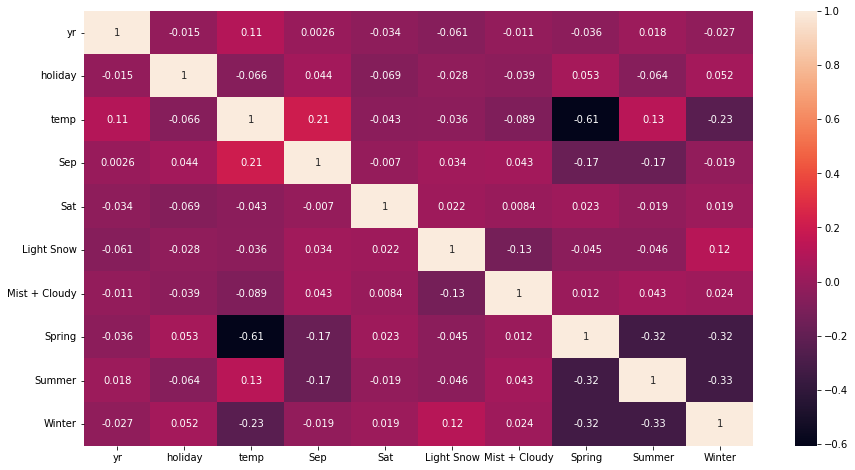

In [88]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new_5.corr(),annot = True)
plt.show()

**Linearity**

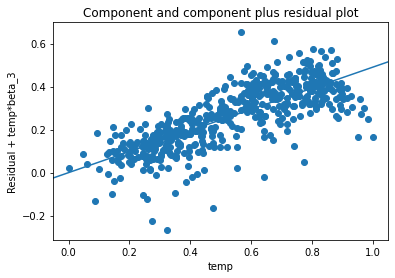

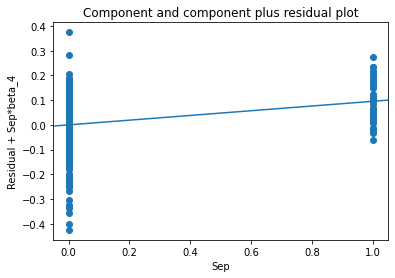

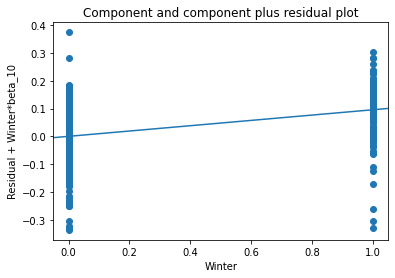

In [89]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_model, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_model, 'Sep')
plt.show()

sm.graphics.plot_ccpr(lr_model, 'Winter')
plt.show()

**Homoscedasticity**

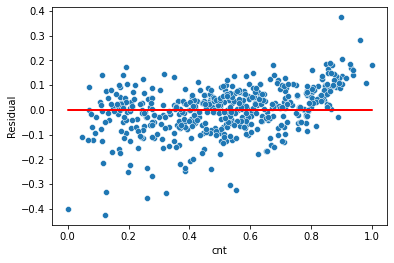

In [90]:
y_train_pred = lr_model.predict(X_train_lr5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('cnt')
plt.ylabel('Residual')
plt.show()

There is no visible pattern, observed from above plot for residuals.

Applying the scaling on the test sets

In [91]:
#perform standardization (MinMax scaling) on test set
#checking the variables to be standardized
scaler_var

['hum', 'windspeed', 'temp', 'cnt']

In [92]:
#perform scaling on test data set
#train dataset is to be fit, test dataset is not fit but simply transformed
#test dataset is transformed based on fit of train dataset
df_test[scaler_var] = scaler.transform(df_test[scaler_var])

In [93]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,...,0,0,1,0,0,0,0,0,1,0


Dividing into X_test and y_test

In [94]:
#building test model using the variable temp
#preparing the variables for model building 

#df_test.columns

y_test = df_test.pop('cnt')
X_test = df_test
X_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.059091,0.086364,0.100000,0.077273,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.236333,0.281541,0.300684,0.267633,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
y_test.head(5)

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [96]:
X_test.head(5)

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,Spring,Summer,Winter
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [97]:
#Columns
X_train_lr5.columns

Index(['const', 'yr', 'holiday', 'temp', 'Sep', 'Sat', 'Light Snow',
       'Mist + Cloudy', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [98]:
#dropping constant
X_train_lr5.drop(columns= 'const', inplace = True)

In [99]:
#creating new X_test dataset based on the feature variables using RFE
X_test_new = X_test[X_train_lr5.columns]

#adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [100]:
#making predictions
y_pred = lr_model.predict(X_test_new)

In [101]:
import scipy as sp
y_residual = y_test - y_pred

**Plotting Q-Q Plot :**

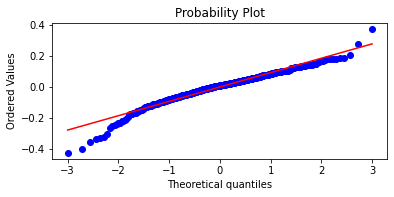

In [102]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

Above plotting showing maximum data points are following straight line meaning data points are normally distributed.

In [103]:
np.mean(y_residual)

0.003538201262235406

Mean is close to Zero (0.003)

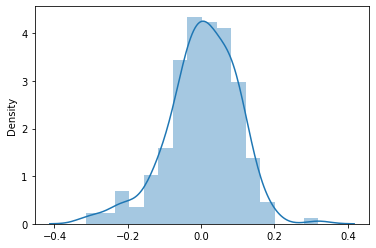

In [104]:
sns.distplot(y_residual)

**Homoscedasticity**

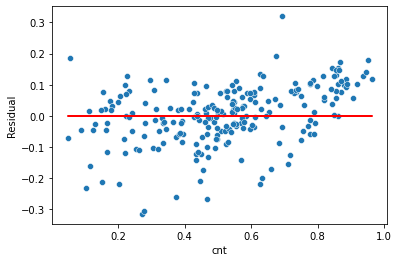

In [105]:
sns.scatterplot(y_test,y_residual)
plt.plot(y_test,(y_test - y_test), '-r')
plt.xlabel('cnt')
plt.ylabel('Residual')
plt.show()

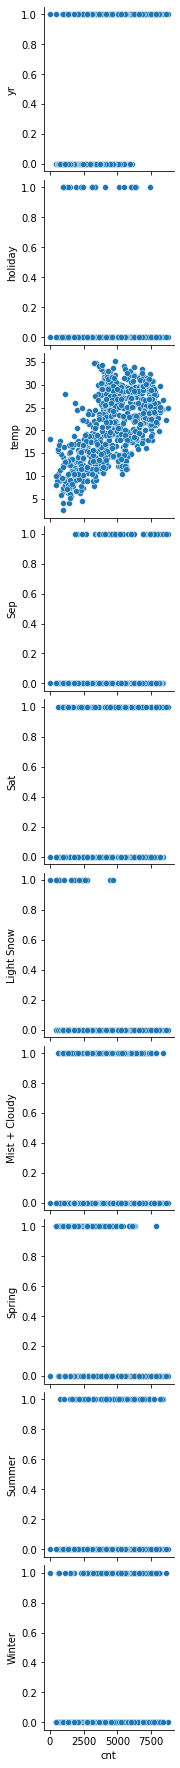

<Figure size 1152x864 with 0 Axes>

In [106]:
#build a scatter plot to observe relationship between the dependent and the feature variables

sns.pairplot(df, y_vars=X_train_lr5.columns, x_vars='cnt')
plt.figure(figsize = (16, 12))
plt.show()

**We can now validate the assumptions of linear regression in the model:**

As we can see, temperature has a linear relationship with the dependent variable (cnt).

As we have observed earlier every variable in our chosen model has a VIF<5 which ensures that there is no mulitcollinearity.

The error distribution as observed above is normal (ie concentrated around 0) which is another assumption of linear regression.

#Step 5: Prediction and Evaluation of test set

In [107]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

r2 score on the train set is 0.8219062389781131


In [108]:
#r2 score of the test set
from sklearn.metrics import r2_score
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

#r2_testscore = r2_score(y_test, y_pred)
#print('r2 score on the test set is', r2_testscore)

r2 score on the test set is 0.8097880132412696


In [109]:
#Test Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)
#n =sample size , p = number of independent variables

Adj_r2_test = 1-(1-r2_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
print('Adjusted r2 score on the test set is', Adj_r2_test)

Adjusted r2 score on the test set is 0.7819035335070055


Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

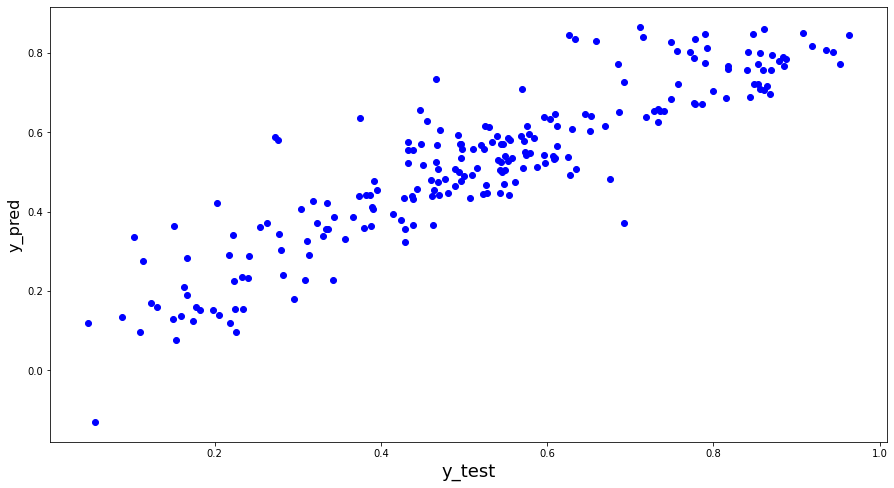

In [110]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Visualising the fit on the test set

In [111]:
round(lr_model.params,4)

const            0.1379
yr               0.2335
holiday         -0.0964
temp             0.4908
Sep              0.0954
Sat              0.0163
Light Snow      -0.3003
Mist + Cloudy   -0.0771
Spring          -0.0647
Summer           0.0526
Winter           0.0957
dtype: float64

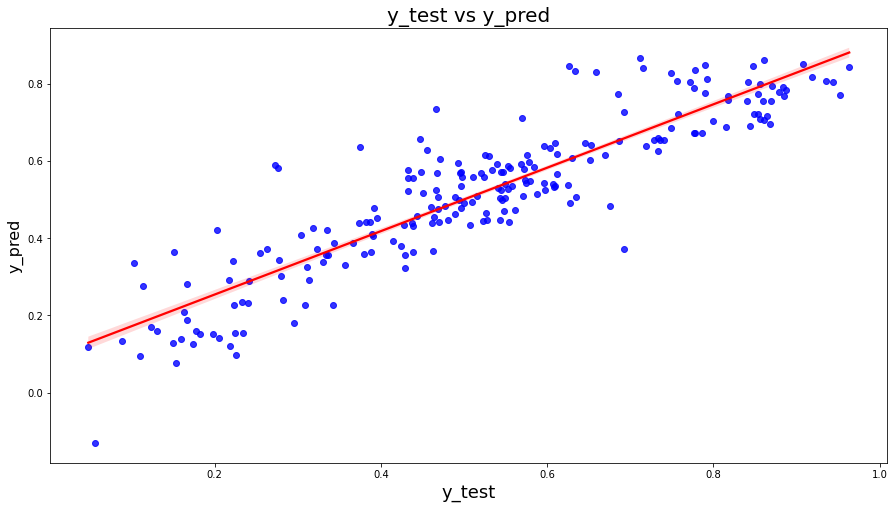

In [112]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)                         
plt.show()

**We can see that the equation of our best fitted line is:**

cnt = (0.4908 * temp) - (0.0964 * holiday) + (0.0954 * Sep) + (0.0163 * Sat) + (0.0526 * Summer) + (0.0957 * Winter) + (0.2335 * yr) + (0.0566 * workingday) − (0.3003 * Light Snow) − (0.0771 * Mist Cloudy) − (0.0647 * Spring) + 0.1379

In [113]:
train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.008952054954058947
Mean squared error of the test set is 0.009094849100552091


#Final Result Comparison between Train and Test Models:

**R^2** -
*   Train R^2 : **0.822**
*   Test R^2: **0.8097**

**Adjusted R^2** -
*   Train Adjusted R^2 : **0.818**
*   Test Adjusted R^2: **0.7819**

#Final Observations:

1. The R-Squared value for train set is **82%** whereas for test set has a value of **81%**, suggesting that our model is able to explain the variance quite accurately on the test set and thus we can conclude that it is a good model.

2. Developed model's mean squared error is almost **0** on both the training and testing datasets, suggesting that the variance is accurately predicted on the test set. The p-values and VIF were used to select the significant variables. Utilized RFE for automated selection of variables.

3. We can observe that there are few variables with negative coefficients, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. We have spring, mist cloudy , light snow variables with negative coefficient. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding the other variables in the model constant.



#Outcomes for Business:

- Bike-sharing provider like BoomBikes can focus more on **Temperature**.

- Also we can see demand for bikes was more in **2019** than 2018, so just focus as there is increase in **2019** and might be facing dips in their revenues due to the ongoing Corona pandemic and by the time it reduces the things will be better

- Focus more on **Summer & Winter season**, **Sep and Sat** variable as they have good influence on bike rentals.

- **Spring,  Mist Cloudy and Light Snow** variable  has negative coefficients and negatively correlated to bike rentals. So business can come up with some exciting offers to increase the demand.